In [1]:
!git clone https://github.com/jiayuzhou/CSE847.git

Cloning into 'CSE847'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 42 (delta 3), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (42/42), done.


rows: [200, 500, 800, 1000, 1500, 2000]
accuracy: [0.9242599000384467, 0.928873510188389, 0.9304113802383699, 0.9304113802383699, 0.9342560553633218, 0.936562860438293]


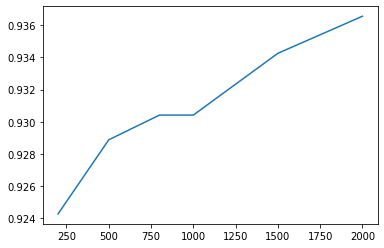

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def predictOp(X, w):
    return 1/(1+np.exp(-X@w))

def logReg(spam_data, spam_labels, eps=1e-5, max=1000):
    wt = np.zeros((spam_data.shape[1],1))
    op = predictOp(spam_data, wt)
    total = eps+1
    n = spam_data.shape[0]
    i = 0
    
    while i < max and total > eps:
        g = np.mean(spam_data.T @ (spam_labels - op), 1).reshape(-1, 1)
        wt += (1e-4) * g
        i += 1
        if i>1:
            total = np.mean(np.abs(op - predictOp(spam_data, wt)))
        op = predictOp(spam_data, wt)
    return wt

def evaluate(n):
    w = logReg(X_train[:n], y_train[:n])
    return (((X_test@w)>0) == y_test).mean()

x_data = [[float(i) for i in line.strip().split('  ')] for line in open('/content/CSE847/data/spam_email/data.txt', 'r').readlines()]
y_data = [float(line.strip()) for line in open('/content/CSE847/data/spam_email/labels.txt', 'r').readlines()]

x_data = np.array(x_data)
x_data = np.concatenate([x_data, np.ones([x_data.shape[0], 1])], 1)
y_data= np.array(y_data).reshape(-1, 1)

X_test = x_data[2000:]
y_test = y_data[2000:]
X_train = x_data[:2000]
y_train = y_data[:2000]

accuracy=[]
rows = [200, 500, 800, 1000, 1500, 2000]
for n in [200, 500, 800, 1000, 1500, 2000]:
    accuracy.append((evaluate(n)))

print('rows:',rows)
print('accuracy:',accuracy)
plt.plot(rows, accuracy)
plt.show()